In [1]:
from protest_impact.data.protests.sources.acled import load_acled

acled = load_acled()
acled.head()

,event_date,sub_event_type,assoc_actor_1,admin1,location,notes,region_code,size,weekday
360,2022-12-31,Peaceful protest,Women (Germany),Baden-Württemberg,Freiburg im Breisgau,"On 31 December 2022, a group of individuals de...",BW,NaN,Saturday
361,2022-12-31,Peaceful protest,NaN,Berlin,Berlin - Mitte,"On 31 December 2022, around 300 individuals jo...",BE,300.0,Saturday
362,2022-12-31,Peaceful protest,NaN,Bremen,Bremen,"On 31 December 2022, around 30 individuals joi...",HB,30.0,Saturday
363,2022-12-31,Peaceful protest,NaN,Hamburg,Hamburg - St. Pauli,"On 31 December 2022, a group of about 30 indiv...",HH,30.0,Saturday
364,2022-12-31,Peaceful protest,NaN,Niedersachsen,Lingen,"On 31 December 2022, a group of individuals de...",NI,NaN,Saturday


In [2]:
from protest_impact.data.news.sources.mediacloud import newspapers_by_region

acled = acled[acled["admin1"].isin(newspapers_by_region.keys())]
climate_actors = [
    "FFF: Fridays for Future; Students (Germany)",
    "ALG: Uprising of the Last Generation (Germany)",
    "Extinction Rebellion",
    "Ende Gelaende",
]
acled = acled[acled["assoc_actor_1"].isin(climate_actors)]
acled = acled[
    (acled["event_date"] >= "2020-03-01") & (acled["event_date"] < "2021-11-01")
]

  0%|          | 0/1210 [00:00<?, ?it/s]

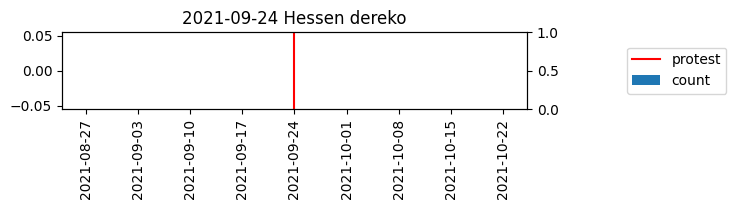

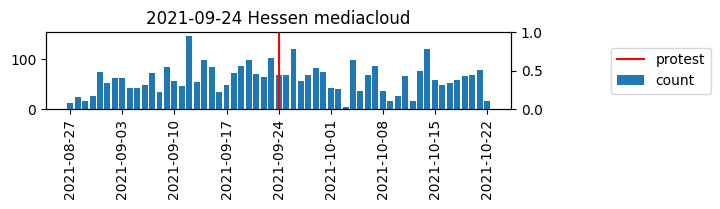

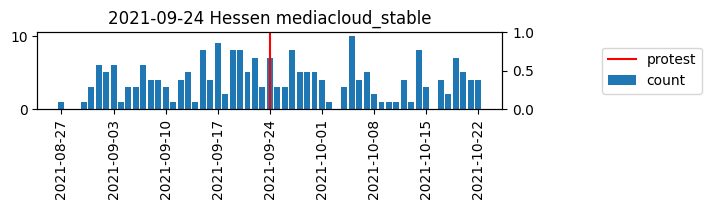

  0%|          | 0/1210 [00:00<?, ?it/s]

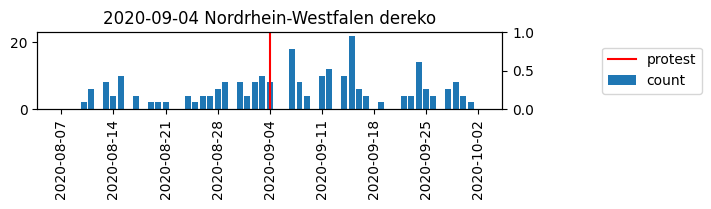

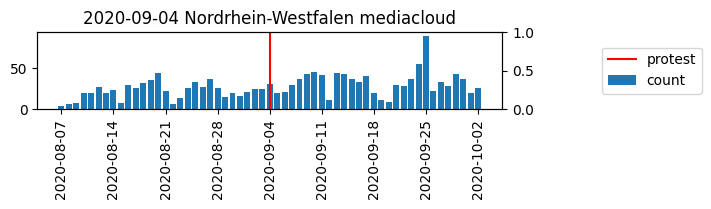

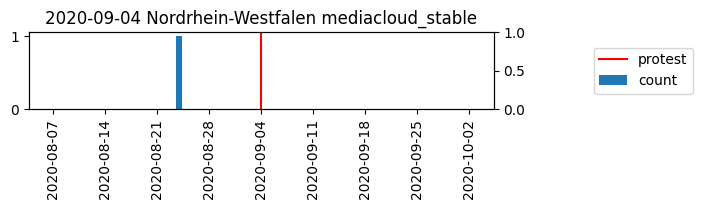

  0%|          | 0/1210 [00:00<?, ?it/s]

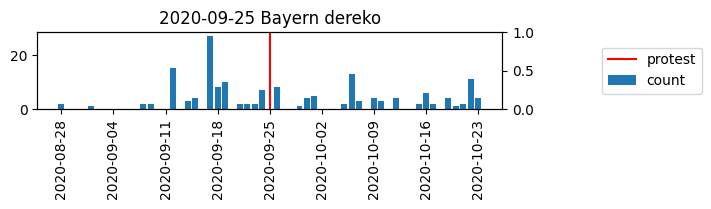

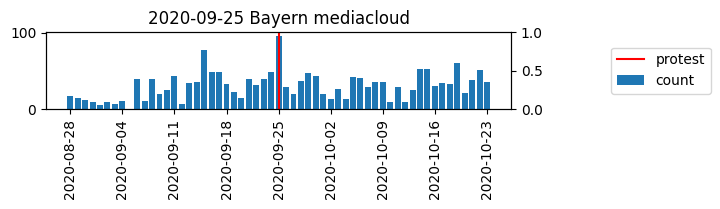

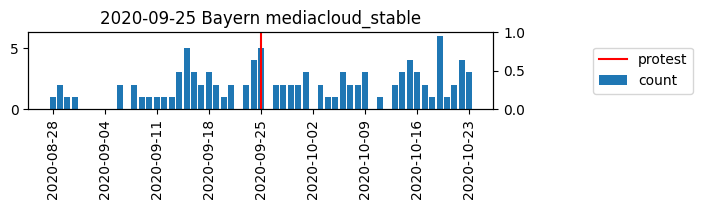

  0%|          | 0/1210 [00:00<?, ?it/s]

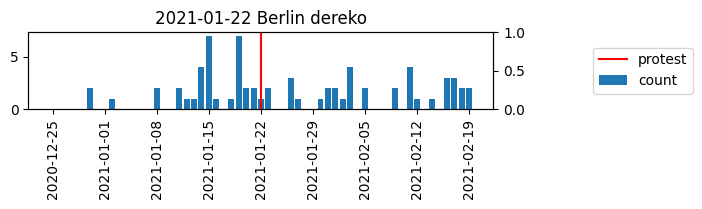

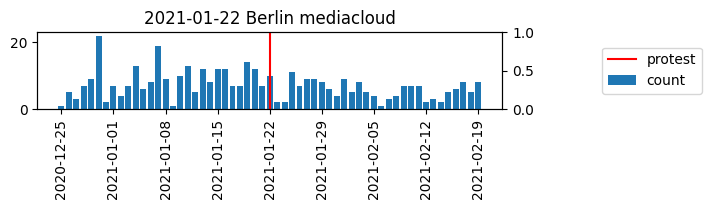

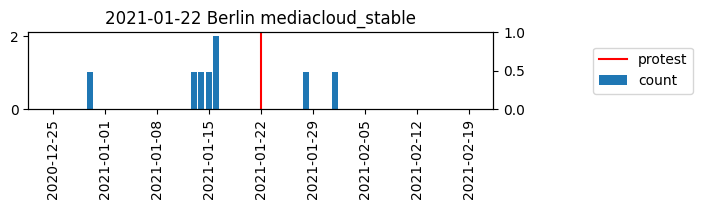

  0%|          | 0/1210 [00:00<?, ?it/s]

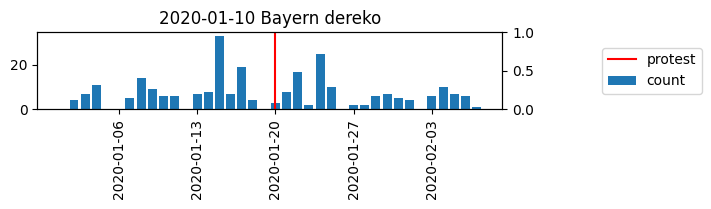

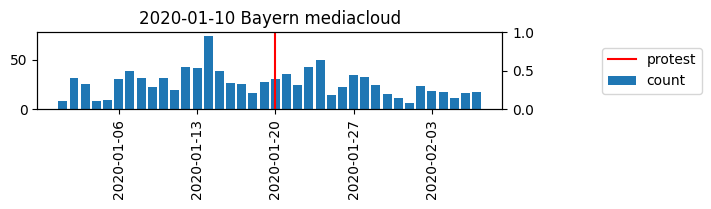

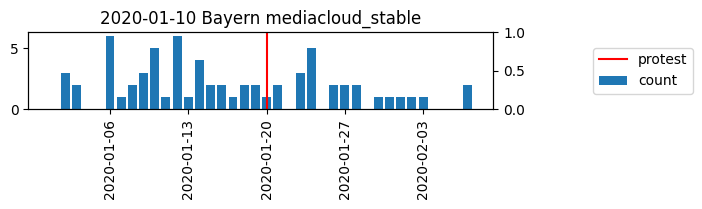

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from dateutil.relativedelta import relativedelta
from protest_impact.data.news import get_regional_count_df
from protest_impact.data.news.visual import plot_coverage_sequence

for protest in acled.sample(5, random_state=1).itertuples():
    protest_date = protest.event_date
    start_date = protest_date - relativedelta(days=7 * 4)
    end_date = protest_date + relativedelta(days=7 * 4)
    for source, df in get_regional_count_df(
        "klimaschutz", protest.admin1, "2020-01-01", "2022-01-01"
    ).items():
        df = df[(df["date"] >= start_date) & (df["date"] <= end_date)]
        plot_coverage_sequence(
            df,
            title=f"{protest_date.date()} {protest.admin1} {source}",
            relative_dates=False,
        )